## Mini Project 2 – Consumer Complaint Resolution Analysis Using Python





Scenario: Product review is the most basic function/factor in resolving customer issues and
increasing the sales growth of any product. We can understand their mindset toward our service
without asking each customer.
When consumers are unhappy with some aspect of a business, they reach out to customer
service and might raise a complaint. Companies try their best to resolve the complaints that they
receive. However, it might not always be possible to appease every customer.
So Here, we will analyze data, and with the help of different algorithms, we are finding the best
classification of customer category so that we can predict our test data.

Objective: Use Python libraries such as Pandas for data operations, Seaborn and Matplotlib for
data visualization and EDA tasks, Sklearn for model building and performance visualization, and
based on the best model, make a prediction for the test file and save the output.
The main objective is to predict whether our customer is disputed or not with the help of given
data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import nltk
import string
from datetime import datetime, date
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score



In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to C:\Users\Varun
[nltk_data]     Salunkhe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Varun
[nltk_data]     Salunkhe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Varun
[nltk_data]     Salunkhe\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
# Read the Data from the Given excel file.

df_train = pd.read_csv('mini project 2 datasets/Consumer_Complaints_train.csv')
df_test = pd.read_csv('mini project 2 datasets/Consumer_Complaints_test.csv')

In [4]:
df_train.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,2015-10-14,Credit reporting,NaN,Incorrect information on credit report,Information is not mine,NaN,NaN,Equifax,GA,30134,NaN,Consent not provided,Web,2015-10-14,Closed with explanation,Yes,No,1605653
1,2015-04-26,Bank account or service,Other bank product/service,Deposits and withdrawals,NaN,RE : XXXX XXXX XXXX-PRIVILEGED AND CONFIDENTIA...,NaN,Wells Fargo & Company,GA,319XX,NaN,Consent provided,Web,2015-04-26,Closed with explanation,Yes,Yes,1347613
2,2013-12-20,Credit card,NaN,Other,NaN,NaN,NaN,Citibank,SC,29203,NaN,NaN,Phone,2014-01-03,Closed with non-monetary relief,Yes,No,640394
3,2016-03-03,Debt collection,"Other (i.e. phone, health club, etc.)",Disclosure verification of debt,Not given enough info to verify debt,NaN,Company has responded to the consumer and the ...,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,43082,NaN,NaN,Referral,2016-03-04,Closed with explanation,Yes,No,1815134
4,2015-01-30,Debt collection,Medical,Disclosure verification of debt,Not given enough info to verify debt,NaN,NaN,"HCFS Health Care Financial Services, Inc.",CA,90036,NaN,NaN,Web,2015-01-30,Closed with explanation,Yes,Yes,1218613


In [5]:
df_test.head()

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Complaint ID
0,2015-01-17,Credit card,NaN,Customer service / Customer relations,NaN,NaN,NaN,Citibank,TX,75241,NaN,NaN,Web,2015-01-17,Closed with monetary relief,Yes,1198133
1,2016-06-22,Consumer Loan,Title loan,Payment to acct not credited,NaN,NaN,Company believes it acted appropriately as aut...,"Larsen MacColl Partners II, L.P.",TX,76548,Servicemember,NaN,Phone,2016-06-22,Closed with explanation,Yes,1979989
2,2015-09-04,Credit card,NaN,Credit line increase/decrease,NaN,I WANT TO REQUEST A CREDIT LINE INCREASE OF XX...,NaN,Capital One,NC,271XX,NaN,Consent provided,Web,2015-09-04,Closed with explanation,Yes,1552090
3,2016-05-17,Consumer Loan,Installment loan,Problems when you are unable to pay,NaN,I have asked One Main Financial not to call my...,NaN,"OneMain Financial Holdings, LLC",MO,634XX,NaN,Consent provided,Web,2016-05-20,Closed with non-monetary relief,Yes,1929306
4,2016-07-07,Debt collection,"Other (i.e. phone, health club, etc.)",Improper contact or sharing of info,Contacted employer after asked not to,I have received several calls from a XXXX XXXX...,Company has responded to the consumer and the ...,"GMA Investments, LLC",SC,296XX,NaN,Consent provided,Web,2016-07-07,Closed with explanation,Yes,2001667


In [6]:
df_train.shape, df_test.shape

((358810, 18), (119606, 17))

In [7]:
df_train.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [8]:
df_test.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Complaint ID'],
      dtype='object')

In [9]:
# Do missing value analysis and drop columns where more than 25% of data are missing
missing_values_train = pd.DataFrame(df_train.isna().sum()/len(df_train)*100, columns = ['Train'])
missing_values_test = pd.DataFrame(df_test.isna().sum()/len(df_test)*100, columns = ['Test'])
missing_values = pd.concat([missing_values_train, missing_values_test], axis = 1)
missing_values


,Train,Test
Date received,0.000000,0.000000
Product,0.000000,0.000000
Sub-product,28.925058,28.997709
Issue,0.000000,0.000000
Sub-issue,61.139322,61.242747
Consumer complaint narrative,84.342688,84.186412
Company public response,81.067696,81.221678
Company,0.000000,0.000000
State,0.809063,0.782569
ZIP code,0.811293,0.783406


In [10]:
missing_values = ['Sub-product', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Tags', 'Consumer consent provided?']
df_train = df_train.drop(missing_values, axis = 1)
df_test = df_test.drop(missing_values, axis = 1)

In [11]:
# Extracting Day, Month, and Year from Date Received Column and create new fields for a
# month, year, and day 

df_train['Year_Received'] = df_train['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').year)
df_test['Year_Received'] = df_test['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').year)
df_train['Month_Received'] = df_train['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').month)
df_test['Month_Received'] = df_test['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').month)
df_train['Day_Received'] = df_train['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').day)
df_test['Day_Received'] = df_test['Date received'].apply(lambda dateString : datetime.strptime(dateString,'%Y-%m-%d').day)

In [12]:
df_train['Date received'] = pd.to_datetime(df_train['Date received'])
df_test['Date received'] = pd.to_datetime(df_test['Date received'])
df_train['Date sent to company'] = pd.to_datetime(df_train['Date sent to company'])
df_test['Date sent to company'] = pd.to_datetime(df_test['Date sent to company'])

In [13]:
# Calculate the Number of Days the Complaint was with the Company and create a new
# field as “Days held”


df_train['Days held'] = df_train['Date sent to company'] - df_train['Date received']
df_test['Days held'] = df_test['Date sent to company'] - df_test['Date received']

In [14]:
# Calculate the Number of Days the Complaint was with the Company and create a new
# field as “Days held”

df_train['Days held'] = df_train['Days held'].astype('timedelta64[D]').astype(int)
df_test['Days held'] = df_test['Days held'].astype('timedelta64[D]').astype(int)

In [15]:
# Drop "Date Received","Date Sent to Company","ZIP Code", "Complaint ID" fields

df_train = df_train.drop(['Date received', 'Date sent to company','ZIP code', 'Complaint ID'], axis = 1)
df_test = df_test.drop(['Date received', 'Date sent to company','ZIP code', 'Complaint ID'], axis = 1)

In [16]:
# Imputing Null value in “State” by Mode

df_train['State'].mode(), df_test['State'].mode()

(0    CA
 Name: State, dtype: object,
 0    CA
 Name: State, dtype: object)

In [17]:
df_train['State'] = df_train['State'].replace(np.nan, 'CA')
df_test['State'] = df_test['State'].replace(np.nan, 'CA')

In [18]:
# Check Missing Values in the dataset

missing_values_train = pd.DataFrame(df_train.isna().sum(), columns = ['Train'])
missing_values_test = pd.DataFrame(df_test.isna().sum(), columns = ['Test'])
missing_values = pd.concat([missing_values_train, missing_values_test], axis = 1)
missing_values

,Train,Test
Product,0,0.0
Issue,0,0.0
Company,0,0.0
State,0,0.0
Submitted via,0,0.0
Company response to consumer,0,0.0
Timely response?,0,0.0
Consumer disputed?,0,NaN
Year_Received,0,0.0
Month_Received,0,0.0


In [19]:
# with the help of the days we calculated above, create a new field 'Week_Received' where
# we calculate the week based on the day of receiving.

week_train = []
for i in df_train['Day_Received']:
    if i < 8:
        week_train.append(1)
    elif i >= 8 and i < 16:
        week_train.append(2)
    elif i >=16 and i < 22:
        week_train.append(3)
    else:
        week_train.append(4)
df_train['Week_Received'] = week_train
week_test = []
for i in df_test['Day_Received']:
    if i < 8:
        week_test.append(1)
    elif i >= 8 and i < 16:
        week_test.append(2)
    elif i >=16 and i < 22:
        week_test.append(3)
    else:
        week_test.append(4)
df_test['Week_Received'] = week_test

In [20]:
df_train = df_train.drop(['Day_Received'], axis = 1)
df_test = df_test.drop(['Day_Received'], axis = 1)

In [21]:
df_train.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Consumer disputed?,Year_Received,Month_Received,Days held,Week_Received
0,Credit reporting,Incorrect information on credit report,Equifax,GA,Web,Closed with explanation,Yes,No,2015,10,0,2
1,Bank account or service,Deposits and withdrawals,Wells Fargo & Company,GA,Web,Closed with explanation,Yes,Yes,2015,4,0,4
2,Credit card,Other,Citibank,SC,Phone,Closed with non-monetary relief,Yes,No,2013,12,14,3
3,Debt collection,Disclosure verification of debt,"FAIR COLLECTIONS & OUTSOURCING, INC.",OH,Referral,Closed with explanation,Yes,No,2016,3,1,1
4,Debt collection,Disclosure verification of debt,"HCFS Health Care Financial Services, Inc.",CA,Web,Closed with explanation,Yes,Yes,2015,1,0,4


In [22]:
#test dataset 
df_test.head()

,Product,Issue,Company,State,Submitted via,Company response to consumer,Timely response?,Year_Received,Month_Received,Days held,Week_Received
0,Credit card,Customer service / Customer relations,Citibank,TX,Web,Closed with monetary relief,Yes,2015,1,0,3
1,Consumer Loan,Payment to acct not credited,"Larsen MacColl Partners II, L.P.",TX,Phone,Closed with explanation,Yes,2016,6,0,4
2,Credit card,Credit line increase/decrease,Capital One,NC,Web,Closed with explanation,Yes,2015,9,0,1
3,Consumer Loan,Problems when you are unable to pay,"OneMain Financial Holdings, LLC",MO,Web,Closed with non-monetary relief,Yes,2016,5,3,3
4,Debt collection,Improper contact or sharing of info,"GMA Investments, LLC",SC,Web,Closed with explanation,Yes,2016,7,0,1


In [23]:
# store data of disputed people into the “disputed_cons” variable for future tasks 

disputed_cons = df_train[df_train['Consumer disputed?'] == 'Yes']

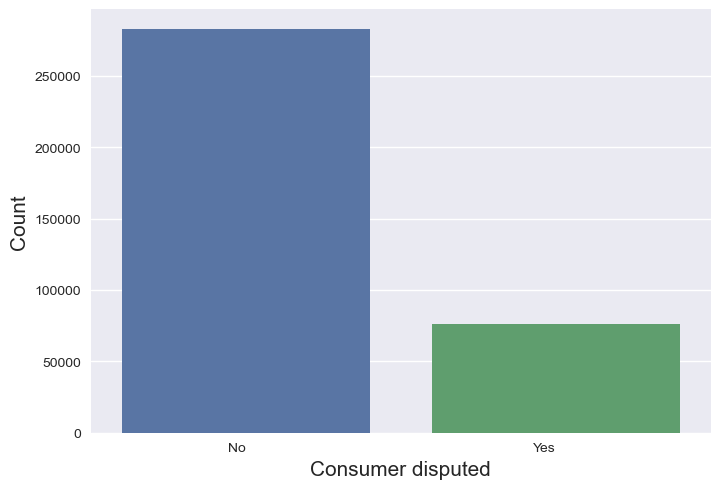

In [24]:
# Plot bar graph of the total no of disputes of consumers with the help of seaborn

plt.style.use("seaborn")
sns.countplot(x = 'Consumer disputed?', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Consumer disputed', fontsize = 15)
plt.ylabel('Count', fontsize = 15);

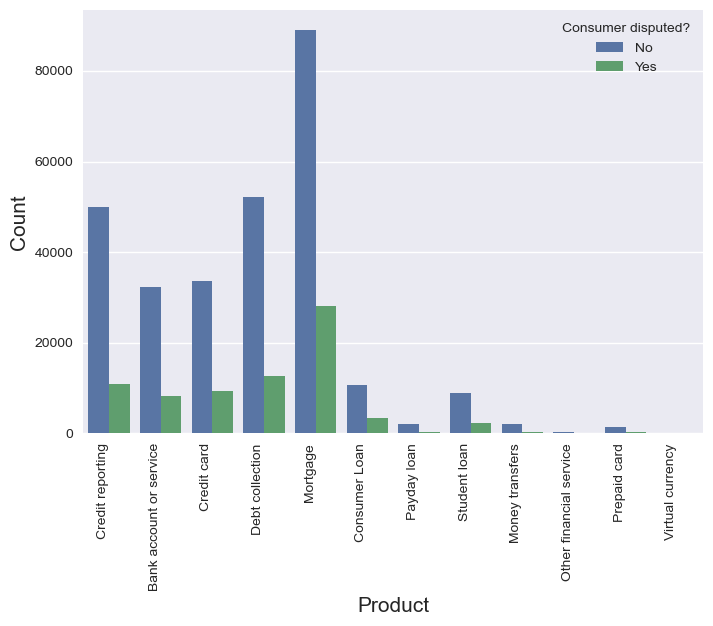

In [25]:
# Plot bar graph of the total no of disputes products-wise with the help of seaborn

sns.countplot(x = 'Product', hue = 'Consumer disputed?', data = df_train)
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Product', fontsize = 15)
plt.ylabel('Count', fontsize = 15);

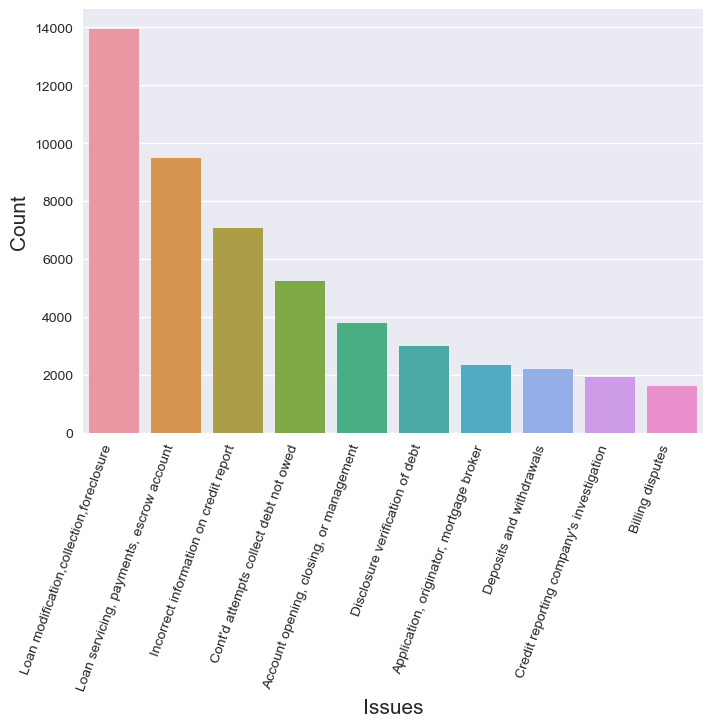

In [26]:
# Plot bar graph of the total no of disputes with Top Issues by Highest Disputes, with the
# help of seaborn


top_issues_disputes = disputed_cons['Issue'].value_counts().sort_values(ascending = False).head(10)
sns.barplot(x = top_issues_disputes.index, y = top_issues_disputes.values)
plt.xticks(rotation = 70, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Issues', fontsize = 15)
plt.ylabel('Count', fontsize = 15);

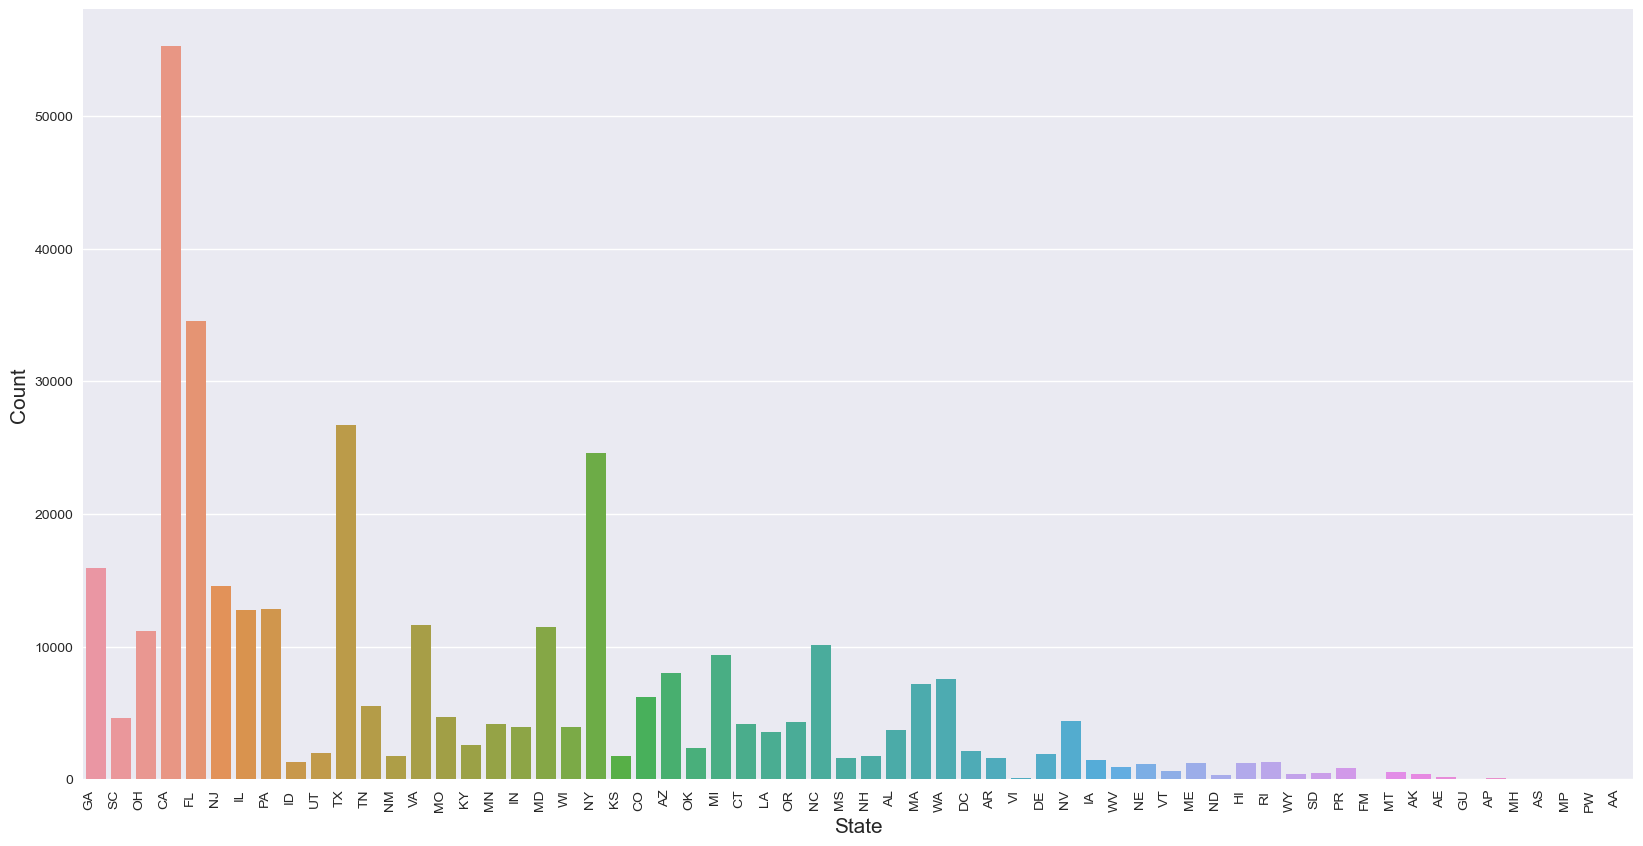

In [27]:
# Plot bar graph of the total no of disputes by State with Maximum Disputes

fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(x = df_train['State'])
plt.xticks(rotation = 90, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('State', fontsize = 15)
plt.ylabel('Count', fontsize = 15);

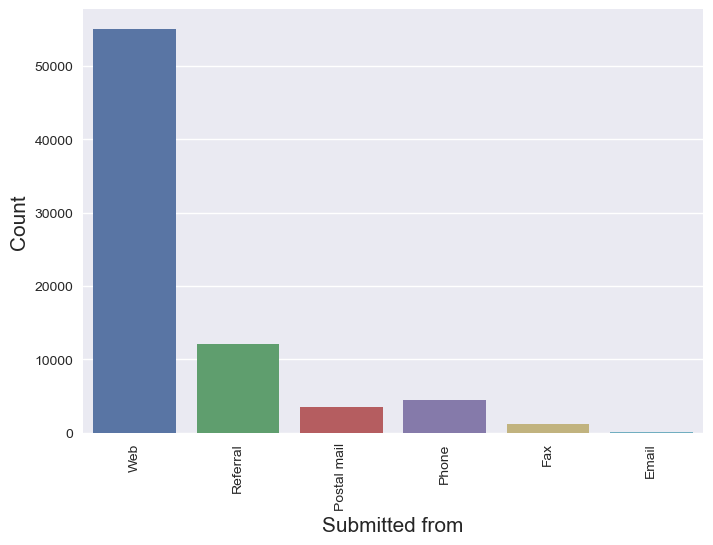

In [28]:
# Plot bar graph of the total no of disputes Submitted Via different source


sns.countplot(x = 'Submitted via', data = disputed_cons)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Submitted from', fontsize = 15)
plt.ylabel('Count', fontsize = 15);

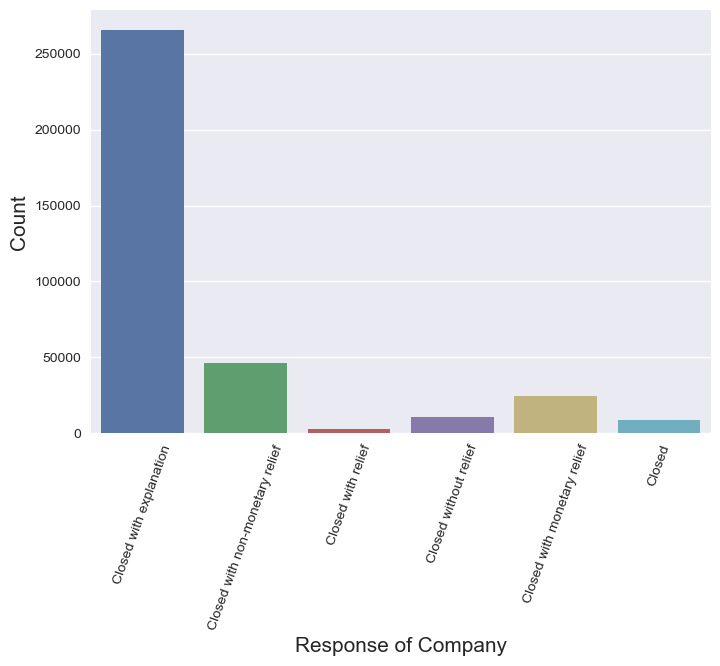

In [29]:
# Plot bar graph of the total no of disputes where the Company's Response to the Complaints

sns.countplot(x = 'Company response to consumer', data = df_train)
plt.xticks(rotation = 70, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Response of Company', fontsize = 15)
plt.ylabel('Count', fontsize = 15);

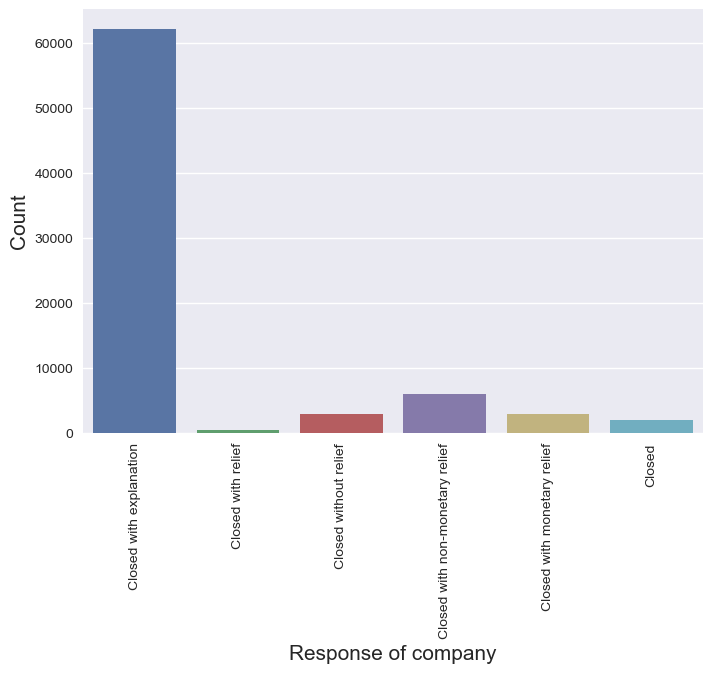

In [30]:
# Plot bar graph of the total no of disputes where the Company's Response Leads to Disputes


sns.countplot(x = 'Company response to consumer', data = disputed_cons)
plt.xticks(rotation = 90, fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Response of company', fontsize = 15)
plt.ylabel('Count', fontsize = 15);

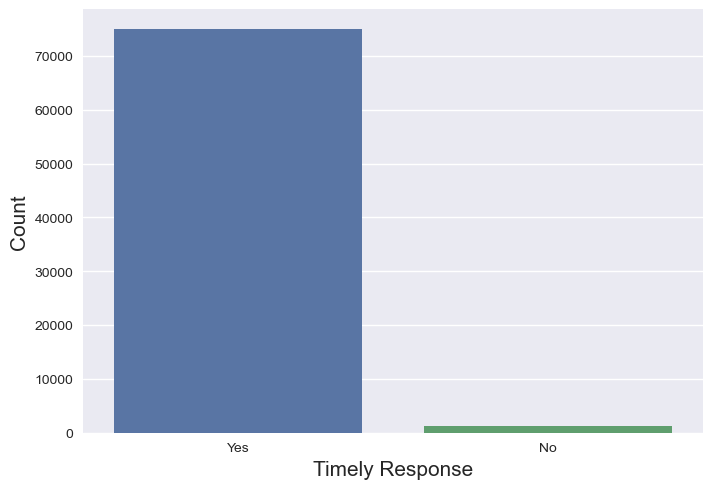

In [31]:
# Plot bar graph of the total no of disputes. Whether there are Disputes Instead of Timely Response

sns.countplot(x = 'Timely response?', data = disputed_cons)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.xlabel('Timely Response', fontsize = 15)
plt.ylabel('Count', fontsize = 15);

Text(0, 0.5, 'Count')

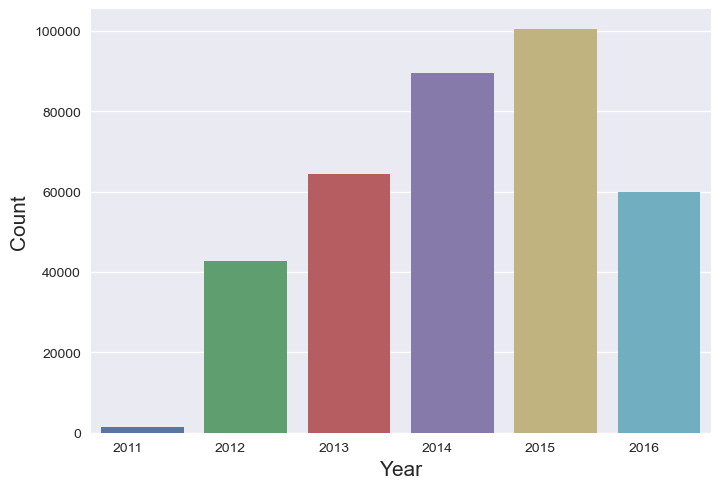

In [32]:
# Plot bar graph of the total no of disputes over Year Wise Complaints

sns.countplot(x = 'Year_Received', data = df_train)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

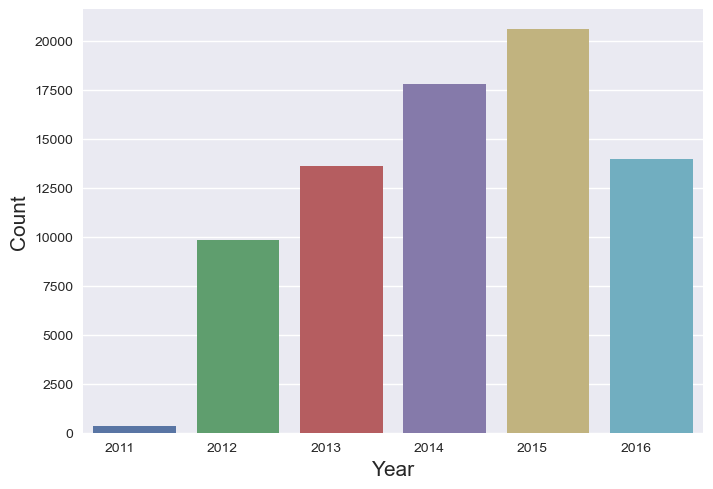

In [33]:
# Plot bar graph of the total no of disputes over Year Wise Disputes

sns.countplot(x = 'Year_Received', data = disputed_cons)
plt.xticks(fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Year', fontsize = 15)
plt.ylabel('Count', fontsize = 15);

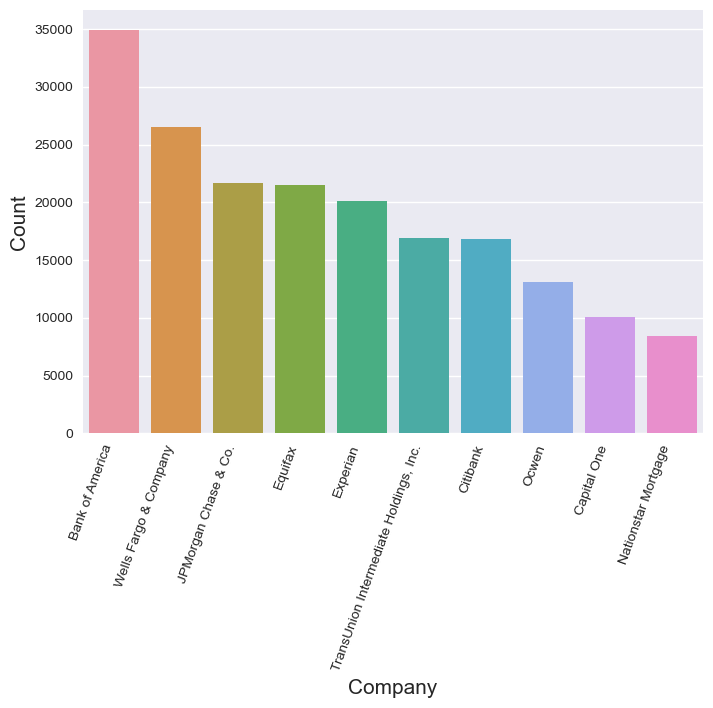

In [34]:
# Plot bar graph of Top Companies with Highest Complaints

worst_company_complaints = df_train['Company'].value_counts().sort_values(ascending = False).head(10)
sns.barplot(x = worst_company_complaints.index, y = worst_company_complaints.values)
plt.xticks(rotation = 70, fontsize = 10, ha = "right")
plt.yticks(fontsize = 10)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('Count', fontsize = 15);

In [35]:
df_train['Days held'].describe()

count    358810.000000
mean          4.456339
std          16.741676
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         993.000000
Name: Days held, dtype: float64

In [36]:
df_test['Days held'].describe()

count    119606.000000
mean          4.443607
std          16.233377
min          -1.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         832.000000
Name: Days held, dtype: float64

In [37]:
# Converte all negative days held to zero (it is the time taken by the authority that can't be negative)

Days_held_train = []
for i in df_train['Days held']:
    if i < 0:
        Days_held_train.append(0)
    else:
        Days_held_train.append(i)
df_train['Days_held'] = Days_held_train
Days_held_test = []
for i in df_test['Days held']:
    if i < 0:
        Days_held_test.append(0)
    else:
        Days_held_test.append(i)
df_test['Days_held'] = Days_held_test

In [38]:


df_train = df_train.drop('Days held', axis = 1)
df_test = df_test.drop('Days held', axis = 1)

In [39]:
relevant_text_train = df_train['Issue']
relevant_text_test = df_test['Issue']
tokenized_data_train = relevant_text_train.apply(lambda x: wordpunct_tokenize(x.lower()))
tokenized_data_test = relevant_text_test.apply(lambda x: wordpunct_tokenize(x.lower()))
def remove_punctuation(text):
    no_punctuation = []
    for w in text:
        if w not in string.punctuation:
            no_punctuation.append(w)
    return no_punctuation
no_punctuation_data_train = tokenized_data_train.apply(lambda x: remove_punctuation(x))
no_punctuation_data_test = tokenized_data_test.apply(lambda x: remove_punctuation(x))
stop_words = stopwords.words('english')
filtered_sentence_train = [w for w in no_punctuation_data_train if not w in stop_words]
filtered_sentence_train = pd.Series(filtered_sentence_train)
filtered_sentence_test = [w for w in no_punctuation_data_test if not w in stop_words]
filtered_sentence_test = pd.Series(filtered_sentence_test)
def lemmatize_text(text):
    lem_text = [WordNetLemmatizer().lemmatize(w,pos = 'v') for w in text]
    return lem_text
lemmatized_data_train = filtered_sentence_train.apply(lambda x:lemmatize_text(x))
lemmatized_data_test = filtered_sentence_test.apply(lambda x:lemmatize_text(x))
def stem_text(text):
    stem_text = [PorterStemmer().stem(w) for w in text]
    return stem_text
stemmed_data_train = lemmatized_data_train.apply(lambda x:stem_text(x))
stemmed_data_test = lemmatized_data_test.apply(lambda x:stem_text(x))
def word_to_sentence(text):
    text_sentence = " ".join(text)
    return text_sentence
clean_data_train = stemmed_data_train.apply(lambda x:word_to_sentence(x))
clean_data_test = stemmed_data_test.apply(lambda x:word_to_sentence(x))

In [40]:
df_train['Issues_cleaned'] = clean_data_train
df_test['Issues_cleaned'] = clean_data_test
df_train = df_train.drop('Issue', axis = 1)
df_test = df_test.drop('Issue', axis = 1)

In [41]:
# Drop Unnecessary Columns for the Model Building
# like:'Company', 'State', 'Year_Received', 'Days_held'

drop_cols = ['Company', 'State', 'Year_Received', 'Days_held']
df_train = df_train.drop(drop_cols, axis = 1)
df_test = df_test.drop(drop_cols, axis = 1)

In [42]:
# Change Consumer Disputed Column to 0 and 1(yes to 1, and no to 0)

df_train['Consumer disputed?'] = np.where(df_train['Consumer disputed?'] == "Yes", 1, 0)

In [43]:
# Create Dummy Variables for categorical features and concat with the original data frame
# like: 'Product,’ 'Submitted via,’ 'Company response to consumer,’ 'Timely response?'

dum_cols = ['Product', 'Submitted via', 'Company response to consumer', 'Timely response?']
df_train_dummies = pd.get_dummies(df_train[dum_cols], prefix_sep = '_', drop_first = True)
df_test_dummies = pd.get_dummies(df_test[dum_cols], prefix_sep = '_', drop_first = True)

In [44]:
df_train = df_train.drop(dum_cols, axis = 1)
df_test = df_test.drop(dum_cols, axis = 1)
df_train = pd.concat([df_train, df_train_dummies], axis = 1)
df_test = pd.concat([df_test, df_test_dummies], axis = 1)

In [45]:
# Scaling the Data Sets (note: discard dependent variable before doing standardization)
# and Make feature Selection with the help of PCA up to 80% of the information.

tf = TfidfVectorizer()
issues_cleaned_train = tf.fit_transform(df_train['Issues_cleaned']).toarray()
issues_cleaned_test = tf.fit_transform(df_test['Issues_cleaned']).toarray()
tf_columns_train = []
tf_columns_test = []
for i in range(issues_cleaned_train.shape[1]):
    tf_columns_train.append('Feature' + str(i+1))
for i in range(issues_cleaned_test.shape[1]):
    tf_columns_test.append('Feature' + str(i+1))
issues_train = pd.DataFrame(issues_cleaned_train, columns = tf_columns_train)
issues_test = pd.DataFrame(issues_cleaned_test, columns = tf_columns_test)
weights = pd.DataFrame(tf.idf_, index = tf.get_feature_names(), columns = ['Idf_weights']).sort_values(by = 'Idf_weights', ascending = False)
weights.head()

,Idf_weights
exchang,11.998819
damag,11.593354
destroy,11.593354
overdraft,11.305672
featur,11.305672


In [46]:
df_train = df_train.drop('Issues_cleaned', axis = 1)
df_test = df_test.drop('Issues_cleaned', axis = 1)
df_train = pd.concat([df_train, issues_train], axis = 1)
df_test = pd.concat([df_test, issues_test], axis = 1)
Feature168 = [0] * 119606
df_test['Feature168'] = Feature168

In [47]:
df_train.head()


,Consumer disputed?,Month_Received,Week_Received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,0,10,2,0,0,1,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,1,4,4,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.596349,0.0,0.0,0.0,0.0
2,0,12,3,0,1,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0,3,1,0,0,0,1,0,0,0,...,0.0,0.0,0.551342,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,1,1,4,0,0,0,1,0,0,0,...,0.0,0.0,0.551342,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [48]:
df_test.head()

,Month_Received,Week_Received,Product_Consumer Loan,Product_Credit card,Product_Credit reporting,Product_Debt collection,Product_Money transfers,Product_Mortgage,Product_Other financial service,Product_Payday loan,...,Feature159,Feature160,Feature161,Feature162,Feature163,Feature164,Feature165,Feature166,Feature167,Feature168
0,1,3,0,1,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
1,6,4,1,0,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
2,9,1,0,1,0,0,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0
3,5,3,1,0,0,0,0,0,0,0,...,0.0,0.0,0.406735,0.0,0.0,0.0,0.0,0.413484,0.0,0
4,7,1,0,0,0,1,0,0,0,0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0


In [49]:
df_train.shape, df_test.shape

((358810, 193), (119606, 192))

In [50]:
df_train_scaled = pd.DataFrame(StandardScaler().fit_transform(df_train.drop('Consumer disputed?', axis = 1)), columns = df_test.columns)
df_test_scaled = pd.DataFrame(StandardScaler().fit_transform(df_test), columns = df_test.columns)

In [51]:
# Splitting the Data Sets Into X and Y by the dependent and independent variables (data selected by PCA)


pca_columns = []
for i in range(df_train_scaled.shape[1]):
    pca_columns.append('PC' + str(i+1))
pca_model = PCA()
pca_model.fit(df_train_scaled)
df_pca_train = pd.DataFrame(pca_model.transform(df_train_scaled), columns = pca_columns)
explained_info_train = pd.DataFrame(pca_model.explained_variance_ratio_, columns=['Explained Info']).sort_values(by = 'Explained Info', ascending = False)
imp = []
for i in range(explained_info_train.shape[0]):
    imp.append(explained_info_train.head(i).sum())
explained_info_train_sum = pd.DataFrame()
explained_info_train_sum['Variable'] = pca_columns
explained_info_train_sum['Importance'] = imp
explained_info_train_sum.head(60)

,Variable,Importance
0,PC1,Explained Info 0.0 dtype: float64
1,PC2,Explained Info 0.035882 dtype: float64
2,PC3,Explained Info 0.069329 dtype: float64
3,PC4,Explained Info 0.10149 dtype: float64
4,PC5,Explained Info 0.128148 dtype: float64
5,PC6,Explained Info 0.153022 dtype: float64
6,PC7,Explained Info 0.177157 dtype: float64
7,PC8,Explained Info 0.199399 dtype: float64
8,PC9,Explained Info 0.221115 dtype: float64
9,PC10,Explained Info 0.242562 dtype: float64


In [ ]:
pca_columns = []
for i in range(53):
    pca_columns.append('PC' + str(i+1))
pca_model = PCA(n_components = 53)
pca_model.fit(df_train_scaled)
df_pca_train = pd.DataFrame(pca_model.transform(df_train_scaled), columns = pca_columns)

In [ ]:
df_pca_train.head()

In [ ]:
#same for test data also
pca_model = PCA(n_components = 53)
pca_model.fit(df_test_scaled)
df_pca_test = pd.DataFrame(pca_model.transform(df_test_scaled), columns = pca_columns)

In [ ]:
df_pca_test.head()

In [ ]:
X = df_pca_train
y = df_train['Consumer disputed?']

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.3, random_state = 17)
X_test = df_pca_test

In [ ]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

### **Model building**
Build given models and measure their test and validation accuracy:
o LogisticRegression
o DecisionTreeClassifier
o RandomForestClassifier
o AdaBoostClassifier
o GradientBoostingClassifier
o KNeighborsClassifier
o XGBClassifier



In [ ]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), KNeighborsClassifier(), XGBClassifier()]
model_names = ['LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'KNeighborsClassifier', 'XGBClassifier']
accuracy_train = []
accuracy_val = []
for model in models:
    mod = model
    mod.fit(X_train, y_train)
    y_pred_train = mod.predict(X_train)
    y_pred_val = mod.predict(X_val)
    accuracy_train.append(accuracy_score(y_train, y_pred_train))
    accuracy_val.append(accuracy_score(y_val, y_pred_val))
data = {'Modelling Algorithm' : model_names, 'Train Accuracy' : accuracy_train, 'Validation Accuracy' : accuracy_val}
data = pd.DataFrame(data)
data['Difference'] = ((np.abs(data['Train Accuracy'] - data['Validation Accuracy'])) * 100)/(data['Train Accuracy'])
data.sort_values(by = 'Validation Accuracy', ascending = False)

In [ ]:
# Whoever gives the most accurate result uses it and predicts the outcome for the test file
# and fills its dispute column so the business team can take some action accordingly.

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_test = lr.predict(X_test)
y_pred_test = pd.DataFrame(y_pred_test, columns = ['Prediction'])
y_pred_test.head()

In [ ]:
y_pred_test.to_csv('Prediction.csv')

_________________________________________